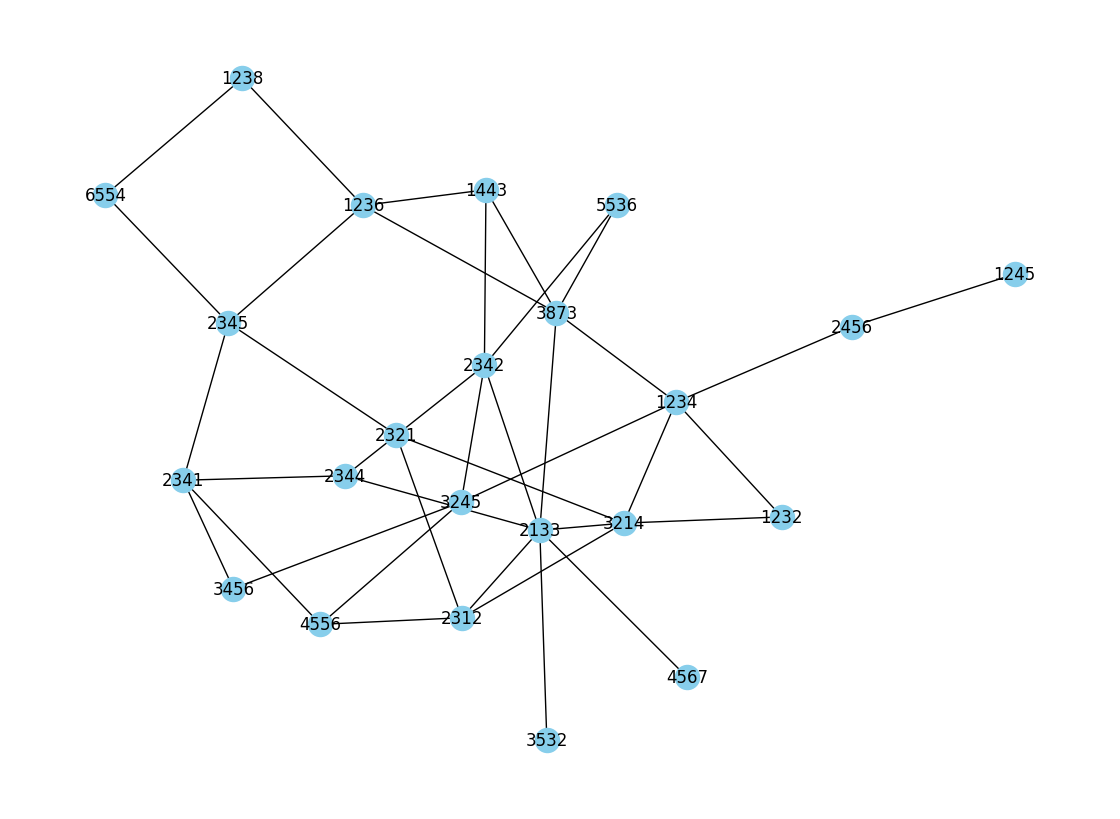

In [39]:
import sys
import pandas as pd
import numpy as np
import networkx as nx
import scipy as sp
import pyvis
import matplotlib.pyplot as plt

df = pd.read_csv('C:\\Users\\Dhiraj\\Videos\\Fraud_Detection\\transactiondata.csv')

#sort the cases as a->b and b>a
df.sort_values(by=['sourceA','destA'],inplace=True,ignore_index=True)
df
#grouping 

df = df.groupby(['sourceA','destA'],sort=False,as_index=False).count()
df.head(10)

G = nx.from_pandas_edgelist(df,source='sourceA',
                             target='destA',
                             edge_attr='amount',
                             create_using = nx.Graph()) 

                             # Graph visualization-Networkx
plt.figure(figsize=(11,8))
#draw circular layout
pos = nx.kamada_kawai_layout(G)
nx.draw(G,with_labels=True,node_color='skyblue',edge_cmap=plt.cm.Blues,pos = pos)
plt.show()
from pyvis.network import Network
#initialize a newtwork
net = Network(notebook=False,width='1000px',height='700px',bgcolor='#222222',font_color='white')

node_degree = dict(G.degree)
# pyvix intreface with newtworkx library

nx.set_node_attributes(G,node_degree,'size')
net.from_nx(G)
net.show('result.html')